# Convolutional Neural Network Architecture

In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 50 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [4]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
54/54 [==============================] - 45s 821ms/step - loss: 0.6843 - accuracy: 0.5892 - val_loss: 0.5891 - val_accuracy: 0.7494
Epoch 2/20
54/54 [==============================] - 45s 830ms/step - loss: 0.5575 - accuracy: 0.7136 - val_loss: 0.4216 - val_accuracy: 0.8080
Epoch 3/20
54/54 [==============================] - 45s 833ms/step - loss: 0.4100 - accuracy: 0.8210 - val_loss: 0.4158 - val_accuracy: 0.8080
Epoch 4/20
54/54 [==============================] - 53s 987ms/step - loss: 0.3195 - accuracy: 0.8709 - val_loss: 0.2925 - val_accuracy: 0.8852
Epoch 5/20
54/54 [==============================] - 52s 973ms/step - loss: 0.2738 - accuracy: 0.9026 - val_loss: 0.2778 - val_accuracy: 0.8899
Epoch 6/20
54/54 [==============================] - 53s 982ms/step - loss: 0.2473 - accuracy: 0.9079 - val_loss: 0.2771 - val_accuracy: 0.8852
Epoch 7/20
54/54 [==============================] - 52s 963ms/step - loss: 0.2222 - accuracy: 0.9173 - val_loss: 0.2869 - val_accuracy: 0.8735

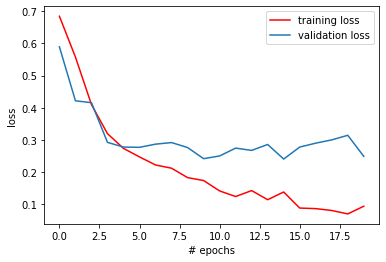

In [5]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

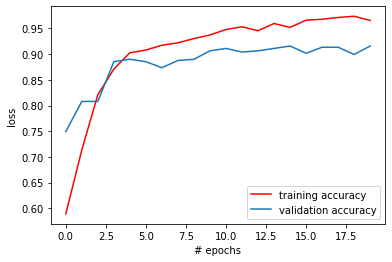

In [6]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [7]:
print(model.evaluate(test_data,test_target))

8/8 [==============================] - 2s 195ms/step - loss: 0.1695 - accuracy: 0.9367
[0.16954296827316284, 0.9367088675498962]


In [8]:
model.save("gec_model_v1.h5")

In [ ]:
model.d